In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [3]:
data=pd.read_csv("sale_data.csv")

In [4]:
data

,Unnamed: 0,CompanyId,Type,Year,TransactionNo,StoreFr,StoreTo,PartyId,ItemSl,ItemId,...,Rate,Amount,DiscountRate,DiscountAmount,GrossAmount,CategoryId,CompanyName,ItemName,CategoryName,Day
0,2095,101,SALE,2001,20010001,10101.0,NaN,1.011030e+09,1,101010041,...,350.0,14000.0,0.0,0.0,14000.0,10101,MILLENNIUM TEA TRADERS,COMBO BOX - 120GR (60bags),TEA,730432
1,2096,101,SALE,2001,20010001,10101.0,NaN,1.011030e+09,2,101010003,...,320.0,32000.0,0.0,0.0,32000.0,10101,MILLENNIUM TEA TRADERS,MTT-MCT-500 MILLENNIUM CLONE TEA 500 GM,TEA,730432
2,2097,101,SALE,2001,20010001,10101.0,NaN,1.011030e+09,3,101010007,...,360.0,18000.0,0.0,0.0,18000.0,10101,MILLENNIUM TEA TRADERS,MTT-MBT-100 MILLENNIUM BLACK TEA 100GM,TEA,730432
3,2098,101,SALE,2018,20180004,10102.0,NaN,1.011030e+09,1,101030393,...,220.0,24200.0,0.0,0.0,24200.0,10101,MILLENNIUM TEA TRADERS,MOTRI BOP,TEA,736657
4,2099,101,SALE,2018,20180004,10102.0,NaN,1.011030e+09,2,101030144,...,202.0,11110.0,0.0,0.0,11110.0,10101,MILLENNIUM TEA TRADERS,KHADIM A/C GOOLNI OF,TEA,736657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65051,87021,118,SALE,2022,20220019,11801.0,NaN,1.181030e+09,4,118030016,...,4300.0,17200.0,0.0,0.0,17200.0,11801,Woodland Door Gallery,LOHA DOOR FRAME- 42'X84''X6''X2.5'',DOOR,738091
65052,87022,118,SALE,2022,20220019,11801.0,NaN,1.181030e+09,5,118030014,...,5000.0,5000.0,0.0,0.0,5000.0,11801,Woodland Door Gallery,LOHA DOOR FRAME- 48'X84''X11''X2.5'',DOOR,738091
65053,87023,118,SALE,2022,20220020,11801.0,NaN,1.181030e+09,1,118020006,...,16000.0,32000.0,0.0,0.0,32000.0,11801,Woodland Door Gallery,SEGUN CTG -39''X81''X1.5'',DOOR,738091
65054,87024,118,SALE,2022,20220020,11801.0,NaN,1.181030e+09,2,118050004,...,2660.0,2660.0,0.0,0.0,2660.0,11801,Woodland Door Gallery,BENGAL DOOR- 4'' (R),DOOR,738091


In [5]:
new_sale=data.groupby("CategoryName").sum()
new_sale

,Unnamed: 0,CompanyId,Year,TransactionNo,StoreFr,StoreTo,PartyId,ItemSl,ItemId,Qty,Rate,Amount,DiscountRate,DiscountAmount,GrossAmount,CategoryId,Day
CategoryName,,,,,,,,,,,,,,,,,
BALL VALVE,157576,309,6051,60510074,30925.0,0.0,3.093090e+09,4,309440004,35.00,3.020000e+02,2.690000e+03,10.0,24.0,2.666000e+03,30936,2209507
BATTERY,29084865,41245,737671,7376762751,4125224.0,0.0,4.128260e+11,5492,41259775302,767.00,2.135434e+05,2.487100e+05,0.0,0.0,2.487100e+05,4126325,269315605
CHANGCHAI,11749777,22470,431638,4316398055,2247224.0,0.0,2.249204e+11,428,22502620695,6381.00,2.054272e+06,1.095777e+07,0.0,0.0,1.095777e+07,2247428,157568206
CHICKEN,15224774,29767,583838,5838392530,2981741.0,0.0,2.979677e+11,352,29916280794,27281.00,2.962713e+06,5.987402e+08,2682.0,7914526.0,5.908257e+08,2976989,213160002
CST TYRE,682707,1339,26221,262210220,134024.0,0.0,1.340339e+10,13,1342140019,35.00,3.340000e+02,1.026000e+03,70.0,21.6,1.004400e+03,134043,9574407
DONG FENG,55013,105,2017,20170157,10501.0,0.0,1.051030e+09,1,105150003,1.00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,10501,736350
DOOR,3219259,4366,74814,748140432,436637.0,0.0,4.369811e+10,67,4367160787,103.00,4.145600e+05,9.504100e+05,0.0,0.0,9.504100e+05,436637,27309232
ECG,58980349,113464,2201883,21997725581,11347491.0,0.0,1.135764e+12,1905,113739150513,3638.17,3.614518e+08,4.207406e+08,0.0,0.0,4.207406e+08,11347491,803925351
EXPORT ITEM,12772296,17316,299108,2991090046,1731766.0,0.0,1.733124e+11,239,17318870264,166892.80,2.885834e+04,1.848071e+07,0.0,0.0,1.848071e+07,1731748,109213965


In [6]:
new_sale=new_sale[['Qty','Amount','Rate']]
new_sale

,Qty,Amount,Rate
CategoryName,,,
BALL VALVE,35.00,2.690000e+03,3.020000e+02
BATTERY,767.00,2.487100e+05,2.135434e+05
CHANGCHAI,6381.00,1.095777e+07,2.054272e+06
CHICKEN,27281.00,5.987402e+08,2.962713e+06
CST TYRE,35.00,1.026000e+03,3.340000e+02
DONG FENG,1.00,0.000000e+00,0.000000e+00
DOOR,103.00,9.504100e+05,4.145600e+05
ECG,3638.17,4.207406e+08,3.614518e+08
EXPORT ITEM,166892.80,1.848071e+07,2.885834e+04


In [7]:
#base on Qty
new_sale.sort_values(by='Qty', ascending=False)

,Qty,Amount,Rate
CategoryName,,,
Local,981057.40,1.059305e+08,9.612502e+04
TEA,573128.30,1.556016e+08,2.305541e+06
REFLECTIVE GLASS,192895.00,1.852943e+07,2.017500e+03
EXPORT ITEM,166892.80,1.848071e+07,2.885834e+04
SAFETY ITEM,92806.50,4.804147e+06,1.984217e+06
WATER HEATER (GEYSER),85647.00,7.366485e+08,3.929790e+08
CHICKEN,27281.00,5.987402e+08,2.962713e+06
IT ITEM,15306.00,3.779059e+06,2.896424e+05
CHANGCHAI,6381.00,1.095777e+07,2.054272e+06


In [8]:
#base on Qty
new_sale.sort_values(by='Amount', ascending=False)

,Qty,Amount,Rate
CategoryName,,,
WATER HEATER (GEYSER),85647.00,7.366485e+08,3.929790e+08
CHICKEN,27281.00,5.987402e+08,2.962713e+06
ECG,3638.17,4.207406e+08,3.614518e+08
TEA,573128.30,1.556016e+08,2.305541e+06
Local,981057.40,1.059305e+08,9.612502e+04
USG,617.00,3.191202e+07,3.159995e+07
SIFANG,3271.00,2.824603e+07,6.088032e+06
REFLECTIVE GLASS,192895.00,1.852943e+07,2.017500e+03
EXPORT ITEM,166892.80,1.848071e+07,2.885834e+04


In [9]:
new_sale.sort_values(by='Rate', ascending=False)

,Qty,Amount,Rate
CategoryName,,,
WATER HEATER (GEYSER),85647.00,7.366485e+08,3.929790e+08
ECG,3638.17,4.207406e+08,3.614518e+08
USG,617.00,3.191202e+07,3.159995e+07
SIFANG,3271.00,2.824603e+07,6.088032e+06
WOOD DOOR,1918.00,7.797526e+06,3.615653e+06
CHICKEN,27281.00,5.987402e+08,2.962713e+06
TEA,573128.30,1.556016e+08,2.305541e+06
CHANGCHAI,6381.00,1.095777e+07,2.054272e+06
SAFETY ITEM,92806.50,4.804147e+06,1.984217e+06


In [10]:
sale_day= {}
for day, day_data in data.groupby('Day'):
            print(day, day_data['Amount'].sum())
            sale_day[day] =day_data['Amount'].sum() 

730432 64000.0
733801 8931.0
735682 0.0
735747 35000.0
735748 325000.0
735754 2000.0
735755 17000.0
735758 80000.0
735760 230000.0
735761 17000.0
735762 29000.0
735765 206000.0
735774 20500.0
735776 6000.0
735778 15000.0
735783 889000.0
735785 6000.0
735786 12000.0
735789 204320.0
735792 2490000.0
735796 1200000.0
735800 6000.0
735806 170000.0
735810 191700.0
735812 15000.0
735814 5000.0
735817 1025000.0
735824 649999.99
735827 30000.0
735830 7000.0
735833 25000.0
735835 8700.0
735837 30000.0
735843 6000.0
735847 0.0
735852 17000.0
735854 105000.0
735858 50000.0
735861 36000.0
735875 620000.0
735876 15000.0
735881 3000.0
735884 710000.0
735889 170000.0
735890 370000.0
735891 3000.0
735900 18370000.0
735901 80800.0
735909 2667000.0
735911 140000.0
735915 12800.0
735917 235000.0
735925 6000.0
735929 10000.0
735933 114000.0
735936 165000.0
735940 725000.0
735943 15000.0
735957 100000.0
735958 220000.0
735961 30000.0
735963 220000.0
735964 9800.0
735965 95000.0
735969 8700.0
735970 2500.0


736690 20000.0
736691 145805.0
736692 3077892.0
736693 7380.0
736694 22060.0
736695 1845590.0
736696 17100.0
736697 723877.0
736698 733490.0
736699 425590.0
736700 58380.0
736701 15005.0
736702 19630.0
736703 17840.0
736704 16970.0
736705 89680.0
736706 84780.0
736707 1469478.5
736708 167710.0
736709 17060.0
736710 28000.0
736711 37680.0
736712 428465.0
736713 88300.0
736714 205240.0
736715 2241300.0
736716 44603.0
736717 5520.0
736718 60284.0
736719 30174.0
736720 6350.0
736721 16960.0
736722 815.0
736723 9306.0
736724 203085.0
736725 321510.0
736726 95630.0
736727 74664.0
736728 39495.0
736729 83491.0
736730 477255.0
736731 21690.0
736732 86170.0
736733 243445.0
736734 55060.0
736735 1358140.0
736736 90675.0
736737 1587880.0
736739 37160.0
736740 1707750.0
736741 3860.0
736742 109310.0
736743 89510.0
736744 39975.0
736745 5220.0
736746 67550.0
736747 81420.0
736748 15230.0
736749 57190.0
736750 33385.0
736751 1836195.0
736752 24575.0
736753 117650.0
736754 8270.0
736755 23261904.0
73

737437 7200.0
737438 23234.0
737439 124720.0
737440 10494.0
737441 945.0
737442 7677.0
737443 12650.0
737444 156992.0
737445 60226.0
737446 3500.0
737447 47105.0
737448 1000020.0
737449 70770.0
737450 6020.0
737451 1935.0
737452 57405.0
737453 68266.0
737454 93194.0
737455 110405.1
737456 72758.0
737457 77356.0
737458 14829.0
737459 71718.0
737460 186554.0
737461 4955094.0
737462 99976.0
737463 138563.5
737464 108164.0
737465 95916.5
737466 382357.0
737467 198944.0
737468 143607.0
737469 129400.0
737470 1923874.0
737471 5924.0
737472 14998.0
737473 33000.0
737474 6900.0
737476 19944.0
737477 8320.0
737478 8484.0
737479 1208.0
737480 17884.0
737481 387049.5
737482 315255.95
737483 215896.0
737484 3283284.0
737485 350887.0
737486 199445.0
737487 227355.0
737488 167860.0
737489 475613.0
737490 951363.0
737491 1310331.0
737492 621212.0
737493 667492.2
737494 576115.5
737495 345554.0
737496 399963.5
737497 315175.5
737498 529463.5
737499 442845.5
737500 587953.5
737501 1134793.0
737502 4139

738027 1343939.0
738028 92400.0
738029 1820220.96
738030 389664.0
738031 863005.0
738032 1189655.0
738033 773472.0
738034 764815.16
738035 16000.0
738036 1590358.25
738037 1257738.0
738038 1120639.62
738039 772864.0
738040 1200170.0
738041 32038.0
738042 87900.0
738043 1727280.25
738044 889570.0
738045 1622805.08
738046 1718246.0
738047 1000191.0
738048 1831466.0
738049 212080.0
738050 958090.0800000001
738051 833877.0
738052 1238044.0
738053 886229.0
738054 725916.0
738055 475137.2
738056 1361580.0
738061 845966.0
738062 953645.12
738063 1198835.0
738064 938746.25
738065 1193223.04
738066 728578.31
738067 218700.0
738068 1204593.0
738069 1078397.2
738070 411864.0
738071 670540.0
738072 261164.0
738073 925752.0
738074 40500.0
738075 373911.0
738076 610657.24
738077 1796953.0
738078 354305.0
738079 1325431.0
738080 938409.0
738081 86941.0
738082 3110287.0
738083 328090.0
738084 1076925.0
738085 897725.0
738086 249082.0
738087 1138973.3599999999
738088 92900.0
738089 1428457.0
738090 106

In [11]:
data1 = []
for day in sale_day:
    if(day!=738091):
        data1.append([day, sale_day[day]])

df = pd.DataFrame(data1, columns = ['Day', 'DayAmount'])
df2 = pd.DataFrame(data1, columns = ['Day', 'DayAmount'])
x = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

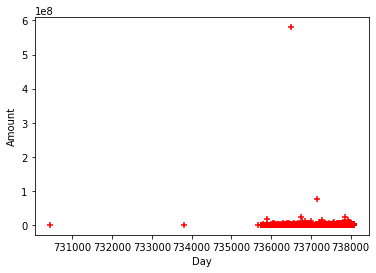

In [12]:
%matplotlib inline
plt.xlabel('Day')
plt.ylabel('Amount')
plt.scatter(df.Day,df.DayAmount,color='red',marker='+')

In [13]:
new_df = df.drop('DayAmount',axis='columns')
new_df

,Day
0,730432
1,733801
2,735682
3,735747
4,735748
...,...
1932,738086
1933,738087
1934,738088
1935,738089


In [14]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler(feature_range=(0,1))
# new_df = scaler.fit_transform(new_df)

In [15]:
amount = df.DayAmount
amount

0         64000.00
1          8931.00
2             0.00
3         35000.00
4        325000.00
           ...    
1932     249082.00
1933    1138973.36
1934      92900.00
1935    1428457.00
1936    1061968.24
Name: DayAmount, Length: 1937, dtype: float64

In [16]:
df=df.reset_index()['DayAmount']

In [17]:
df

0         64000.00
1          8931.00
2             0.00
3         35000.00
4        325000.00
           ...    
1932     249082.00
1933    1138973.36
1934      92900.00
1935    1428457.00
1936    1061968.24
Name: DayAmount, Length: 1937, dtype: float64

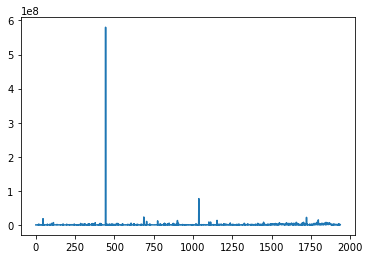

In [18]:
import matplotlib.pyplot as plt
plt.plot(df)

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(np.array(df).reshape(-1,1))

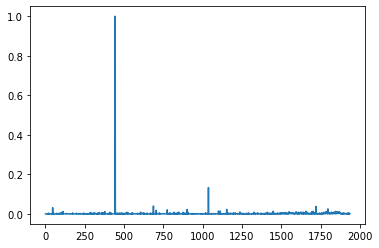

In [20]:
import matplotlib.pyplot as plt
plt.plot(df)

In [21]:
##splitting dataset into train and test split
training_size=int(len(df)*0.75)
test_size=len(df)-training_size
train_data,test_data=df[0:training_size,:],df[training_size:len(df),:1]

In [22]:
training_size,test_size

(1452, 485)

In [23]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]  
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [24]:
time_step = 10
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [25]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [26]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,RNN,SimpleRNN
from tensorflow.keras.layers import LSTM

In [27]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(10,1)))
model.add(LSTM(50,activation='relu',return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam',metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 10, 50)            20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
23/23 [==============================] - 12s 118ms/step - loss: 7.2733e-04 - accuracy: 0.0014 - val_loss: 9.7527e-06 - val_accuracy: 0.0000e+00
Epoch 2/100
23/23 [==============================] - 1s 34ms/step - loss: 7.1554e-04 - accuracy: 0.0014 - val_loss: 4.3122e-05 - val_accuracy: 0.0000e+00
Epoch 3/100
23/23 [==============================] - 1s 33ms/step - loss: 7.2458e-04 - accuracy: 0.0014 - val_loss: 9.9085e-06 - val_accuracy: 0.0000e+00
Epoch 4/100
23/23 [==============================] - 1s 36ms/step - loss: 7.1038e-04 - accuracy: 0.0014 - val_loss: 1.2743e-05 - val_accuracy: 0.0000e+00
Epoch 5/100
23/23 [==============================] - 1s 34ms/step - loss: 7.1233e-04 - accuracy: 0.0014 - val_loss: 1.1757e-05 - val_accuracy: 0.0000e+00
Epoch 6/100
23/23 [==============================] - 1s 35ms/step - loss: 7.1230e-04 - accuracy: 0.0014 - val_loss: 2.0702e-05 - val_accuracy: 0.0000e+00
Epoch 7/100
23/23 [==============================] - 1s 37ms/step - loss: 

In [30]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [31]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [32]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

1396077.2421328581

In [33]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

1397094.087644454

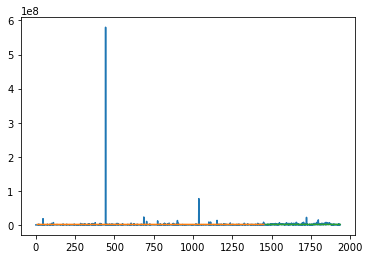

In [34]:
### Plotting 
# shift train predictions for plotting
look_back=10
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [35]:
x_input=test_data[475:].reshape(1,-1)
x_input.shape

(1, 10)

In [36]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [37]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=10
i=0
while(i<30):
    
    if(len(temp_input)>10):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.0024085]
11
1 day input [0.00536191 0.0005656  0.00185654 0.00154761 0.0004294  0.00196351
 0.00016015 0.00246256 0.00183076 0.0024085 ]
1 day output [[0.00240848]]
2 day input [0.0005656  0.00185654 0.00154761 0.0004294  0.00196351 0.00016015
 0.00246256 0.00183076 0.0024085  0.00240848]
2 day output [[0.0024085]]
3 day input [0.00185654 0.00154761 0.0004294  0.00196351 0.00016015 0.00246256
 0.00183076 0.0024085  0.00240848 0.0024085 ]
3 day output [[0.0024085]]
4 day input [0.00154761 0.0004294  0.00196351 0.00016015 0.00246256 0.00183076
 0.0024085  0.00240848 0.0024085  0.0024085 ]
4 day output [[0.0024085]]
5 day input [0.0004294  0.00196351 0.00016015 0.00246256 0.00183076 0.0024085
 0.00240848 0.0024085  0.0024085  0.0024085 ]
5 day output [[0.0024085]]
6 day input [0.00196351 0.00016015 0.00246256 0.00183076 0.0024085  0.00240848
 0.0024085  0.0024085  0.0024085  0.0024085 ]
6 day output [[0.0024085]]
7 day input [0.00016015 0.00246256 0.00183076 0.0024085  0.00240848 0.002

In [38]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

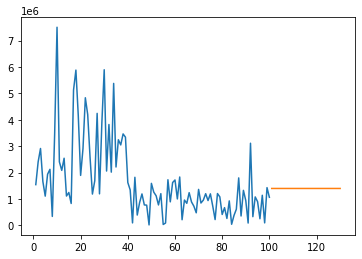

In [39]:
plt.plot(day_new,scaler.inverse_transform(df[1837:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

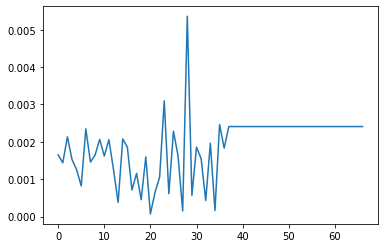

In [40]:
df1=df.tolist()
df1.extend(lst_output)
plt.plot(df1[1900:])

In [41]:
df1=scaler.inverse_transform(df1).tolist()

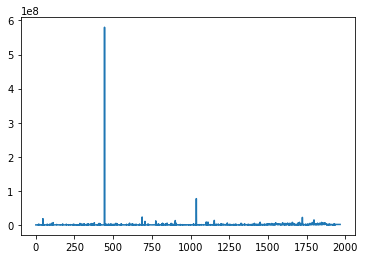

In [42]:
plt.plot(df1)

In [43]:
df1[1938]

[1397089.6587711293]

# profit calculate stockTables

In [44]:
buy_data=pd.read_csv('buy_data1.csv')

In [45]:
buy_data

,Unnamed: 0,CompanyId,Type,Date,Year,TransactionNo,StoreFr,StoreTo,PartyId,ItemSl,...,DiscountRate,DiscountAmount,GrossAmount,CategoryId,CompanyName,ItemName,CategoryName,day,month,Day
0,0,101,BUY,2017-12-31,2017,20170001,NaN,10102.0,1.012030e+09,1,...,0.0,0.0,0.0,10101,MILLENNIUM TEA TRADERS,OODALEAH BOP,TEA,31,12,736596
1,1,101,BUY,2017-12-31,2017,20170001,NaN,10102.0,1.012030e+09,3,...,0.0,0.0,0.0,10101,MILLENNIUM TEA TRADERS,JHEMAI PF,TEA,31,12,736596
2,2,101,BUY,2017-12-31,2017,20170001,NaN,10102.0,1.012030e+09,4,...,0.0,0.0,0.0,10101,MILLENNIUM TEA TRADERS,MOOMINCHERRA GBOP,TEA,31,12,736596
3,3,101,BUY,2017-12-31,2017,20170001,NaN,10102.0,1.012030e+09,5,...,0.0,0.0,0.0,10101,MILLENNIUM TEA TRADERS,MOOMINCHERRA FOF,TEA,31,12,736596
4,4,101,BUY,2017-12-31,2017,20170001,NaN,10102.0,1.012030e+09,6,...,0.0,0.0,0.0,10101,MILLENNIUM TEA TRADERS,AMEENABAD FBOP,TEA,31,12,736596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10423,86984,118,BUY,2022-01-21,2022,20220008,NaN,11801.0,1.182030e+09,5,...,0.0,0.0,9800.0,11801,Woodland Door Gallery,LOHA DOOR FRAME- 48'X84''X11''X2.5'',DOOR,21,1,738081
10424,86985,118,BUY,2022-01-21,2022,20220008,NaN,11801.0,1.182030e+09,6,...,0.0,0.0,7600.0,11801,Woodland Door Gallery,GODA DOOR FRAME-48''X84''X11'X2.5'',DOOR,21,1,738081
10425,86986,118,BUY,2022-01-21,2022,20220008,NaN,11801.0,1.182030e+09,7,...,0.0,0.0,16000.0,11801,Woodland Door Gallery,ORIENTAL NATURAL COFFE PLANE 30''X84'' R,DOOR,21,1,738081
10426,86987,118,BUY,2022-01-21,2022,20220008,NaN,11801.0,1.182030e+09,8,...,0.0,0.0,16000.0,11801,Woodland Door Gallery,ORIENTAL NATURAL COFFE PLANE 30''X84'' L,DOOR,21,1,738081


In [46]:
buy_Year= {}
for Year, Year_data in buy_data.groupby('Year'):
            print(Year, Year_data['Amount'].sum())
            buy_Year[Year] =Year_data['Amount'].sum() 

2015 4204152.0
2016 72105925.0
2017 72651047.12
2018 81754033.36
2019 139919702.32
2020 260470997.94
2021 584917111.97
2022 2082036.07


In [47]:
data1 = []
for Year in buy_Year:
        data1.append([Year, buy_Year[Year]])

df1 = pd.DataFrame(data1, columns = ['Year', 'YearAmount'])

In [48]:
df1

,Year,YearAmount
0,2015,4.204152e+06
1,2016,7.210592e+07
2,2017,7.265105e+07
3,2018,8.175403e+07
4,2019,1.399197e+08
5,2020,2.604710e+08
6,2021,5.849171e+08
7,2022,2.082036e+06


In [49]:
sale_Year= {}
for Year, Year_data in data.groupby('Year'):
            print(Year, Year_data['Amount'].sum())
            sale_Year[Year] =Year_data['Amount'].sum() 

2001 64000.0
2010 8931.0
2015 8161219.99
2016 81238466.0
2017 729136463.0
2018 174193545.72
2019 264367315.92000002
2020 271000902.89
2021 655948598.35
2022 27384834.759999998


In [50]:
data1 = []
for Year in sale_Year:
        data1.append([Year, sale_Year[Year]])

df2 = pd.DataFrame(data1, columns = ['Year', 'YearAmount'])

In [51]:
df1

,Year,YearAmount
0,2015,4.204152e+06
1,2016,7.210592e+07
2,2017,7.265105e+07
3,2018,8.175403e+07
4,2019,1.399197e+08
5,2020,2.604710e+08
6,2021,5.849171e+08
7,2022,2.082036e+06


In [52]:
df2.drop([0,1],axis=0,inplace=True)

In [53]:
df2=df2.reset_index()

In [54]:
df2

,index,Year,YearAmount
0,2,2015,8.161220e+06
1,3,2016,8.123847e+07
2,4,2017,7.291365e+08
3,5,2018,1.741935e+08
4,6,2019,2.643673e+08
5,7,2020,2.710009e+08
6,8,2021,6.559486e+08
7,9,2022,2.738483e+07


In [55]:
df2.drop(['index'],axis=1,inplace=True)

In [56]:
df2

,Year,YearAmount
0,2015,8.161220e+06
1,2016,8.123847e+07
2,2017,7.291365e+08
3,2018,1.741935e+08
4,2019,2.643673e+08
5,2020,2.710009e+08
6,2021,6.559486e+08
7,2022,2.738483e+07


In [57]:
df2["profit"]=df2["YearAmount"]-df1["YearAmount"]

In [58]:
df2

,Year,YearAmount,profit
0,2015,8.161220e+06,3.957068e+06
1,2016,8.123847e+07,9.132541e+06
2,2017,7.291365e+08,6.564854e+08
3,2018,1.741935e+08,9.243951e+07
4,2019,2.643673e+08,1.244476e+08
5,2020,2.710009e+08,1.052990e+07
6,2021,6.559486e+08,7.103149e+07
7,2022,2.738483e+07,2.530280e+07


In [59]:
i=0
for value in df2["profit"]:
    if(value<0):
        i=i+1
print(i)       

0


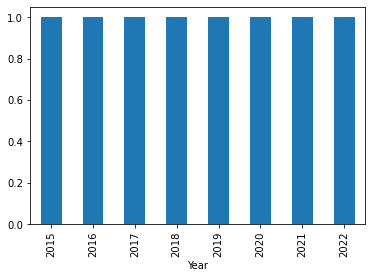

In [60]:
df2.groupby('Year')['profit'].nunique().plot(kind='bar')
plt.show()

<AxesSubplot:xlabel='Year', ylabel='profit'>

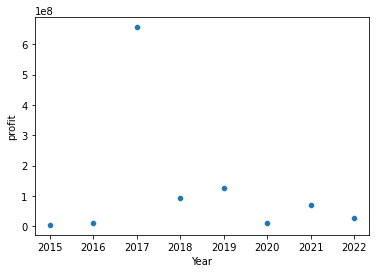

In [61]:
sns.scatterplot(x=df2.Year, y=df2.profit, data=buy_data)

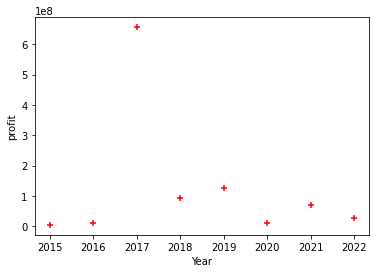

In [62]:
%matplotlib inline
plt.xlabel('Year')
plt.ylabel('profit')
plt.scatter(df2.Year,df2.profit,color='red',marker='+')

In [63]:
df2=df2.drop('YearAmount',axis='columns')

,Year,profit
0,2015,3.957068e+06
1,2016,9.132541e+06
2,2017,6.564854e+08
3,2018,9.243951e+07
4,2019,1.244476e+08
5,2020,1.052990e+07
6,2021,7.103149e+07
7,2022,2.530280e+07


In [65]:
#df2 = df2[df2['Year'] < 2022]

In [66]:
Year = df2.drop('profit',axis='columns')
Year

,Year
0,2015
1,2016
2,2017
3,2018
4,2019
5,2020
6,2021
7,2022


In [67]:
profit = df2.profit
profit

0    3.957068e+06
1    9.132541e+06
2    6.564854e+08
3    9.243951e+07
4    1.244476e+08
5    1.052990e+07
6    7.103149e+07
7    2.530280e+07
Name: profit, dtype: float64

In [68]:
# Create linear regression object
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(Year,profit)

LinearRegression()

In [69]:
reg.predict([[2022]])

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([63876476.36666107])

In [70]:
reg.coef_

array([-17225518.92559524])

In [71]:
reg.intercept_

34893875743.92023

In [72]:
reg.score(Year,profit)

0.036917983184573955

In [73]:
from sklearn.ensemble import RandomForestRegressor
RFR=RandomForestRegressor()

In [74]:
RFR.fit(Year,profit)

RandomForestRegressor()

In [75]:
RFR.predict([[2022]])

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([33568182.45680003])

In [76]:
RFR.score(Year,profit)

0.8043085258604997

In [77]:
from sklearn.tree import DecisionTreeRegressor
DTR=DecisionTreeRegressor()

In [78]:
DTR.fit(Year,profit)

DecisionTreeRegressor()

In [79]:
DTR.predict([[2022]])

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([25302798.69])

In [80]:
DTR.score(Year,profit)

1.0

# per day qty prediction

In [81]:
sale_qty= {}
for day, day_data in data.groupby('Day'):
            print(day, day_data['Qty'].sum())
            sale_qty[day] =day_data['Qty'].sum() 

730432 190.0
733801 2.0
735682 1.0
735747 1.0
735748 1.0
735754 1.0
735755 1.0
735758 1.0
735760 1.0
735761 1.0
735762 41.0
735765 4.0
735774 41.0
735776 1.0
735778 2.0
735783 7.0
735785 1.0
735786 1.0
735789 7.0
735792 5.0
735796 1.0
735800 20.0
735806 13.0
735810 32.0
735812 1.0
735814 1.0
735817 11.0
735824 15.0
735827 1.0
735830 2.0
735833 1.0
735835 30.0
735837 52.0
735843 20.0
735847 1.0
735852 1.0
735854 1.0
735858 1.0
735861 22.0
735875 2.0
735876 2.0
735881 10.0
735884 2.0
735889 1.0
735890 2.0
735891 10.0
735900 5.0
735901 15.0
735909 35.0
735911 1.0
735915 2.0
735917 2.0
735925 1.0
735929 4.0
735933 2.0
735936 1.0
735940 1.0
735943 2.0
735957 1.0
735958 1.0
735961 100.0
735963 1.0
735964 21.0
735965 1.0
735969 30.0
735970 1.0
735972 1.0
735973 9.0
735979 1.0
735980 3.0
735981 3.0
735984 1.0
735986 2.0
735987 1.0
735994 3.0
736000 1.0
736001 1.0
736002 1.0
736004 20.0
736007 1.0
736016 1.0
736018 1.0
736019 20.0
736020 1.0
736021 5.0
736024 2.0
736025 22.0
736026 3.0
736027 2

736790 59.0
736791 99.0
736792 73.0
736793 100.0
736794 28.0
736795 23.0
736796 39.0
736797 12.5
736798 35.5
736799 462.5
736801 140.5
736802 227.5
736803 17.5
736804 26.0
736805 117.0
736806 379.0
736808 637.5
736809 54.5
736810 79.5
736811 48.0
736812 20.0
736813 6.5
736814 149.5
736815 22.5
736816 344.5
736817 34.5
736818 67.0
736819 55.0
736821 54.0
736822 55.0
736823 23.5
736824 370.0
736825 409.5
736826 111.0
736827 260.0
736828 367.0
736829 27.0
736830 222.5
736831 1.0
736835 0.5
736836 12.0
736837 28.0
736838 176.0
736839 5.6
736840 136.0
736841 119.5
736842 24.0
736843 18.0
736844 102.5
736845 347.0
736846 15.0
736848 26.5
736849 310.5
736850 45.6
736851 6.5
736852 8.5
736853 132.5
736855 349.5
736856 217.5
736857 30.5
736858 280.0
736859 286.0
736860 74.5
736861 41.0
736862 37.5
736863 715.5
736864 43.0
736865 418.5
736866 14.0
736867 118.5
736868 310.0
736869 64.0
736870 39.5
736871 336.5
736872 414.5
736873 884.0
736874 62.4
736876 59.0
736877 149.5
736878 40.0
736879 40.0


737545 361.5
737546 838.0
737547 2.0
737548 829.0
737549 1364.9
737550 645.5
737551 486.5
737552 1097.5
737553 390.5
737554 1.0
737555 1278.0
737556 420.5
737557 500.5
737558 1422.0
737559 830.0
737560 1749.5
737561 205.0
737562 4018.5
737563 976.5
737564 942.5
737565 628.0
737566 1556.0
737567 1101.0
737568 3.0
737569 849.0
737570 447.5
737571 1577.0
737572 339.5
737573 475.0
737574 602.0
737575 746.0
737576 68.0
737577 69.5
737578 142.5
737579 134.0
737580 97.0
737581 17.0
737582 159.5
737583 750.5
737584 136.5
737585 1128.5
737586 787.5
737587 589.0
737588 3.0
737589 328.5
737590 73.5
737591 241.0
737592 157.0
737593 413.5
737594 143.0
737595 8.0
737596 192.5
737597 251.5
737598 262.0
737599 112.5
737600 239.0
737601 163.5
737602 3.0
737603 164.5
737604 158.0
737605 114.5
737606 100.5
737607 217.0
737608 194.5
737609 12.0
737610 141.5
737611 212.5
737612 505.5
737613 73.0
737614 1192.5
737615 1477.0
737616 13.0
737617 1205.5
737618 414.0
737619 311.5
737620 621.5
737621 1428.5
73762

In [82]:
data1 = []
for day in sale_qty:
    if(day!=738091):
        data1.append([day, sale_qty[day]])

df3 = pd.DataFrame(data1, columns = ['Day', 'Qty'])

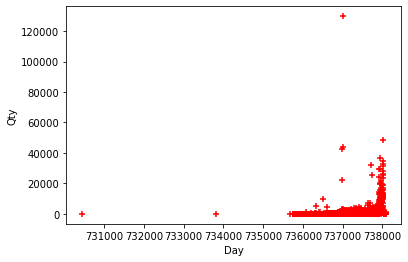

In [83]:
%matplotlib inline
plt.xlabel('Day')
plt.ylabel('Qty')
plt.scatter(df3.Day,df3.Qty,color='red',marker='+')

In [84]:
df3=df3.reset_index()['Qty']

In [85]:
df3

0       190.0
1         2.0
2         1.0
3         1.0
4         1.0
        ...  
1932    128.0
1933    729.0
1934      8.0
1935    519.0
1936    512.0
Name: Qty, Length: 1937, dtype: float64

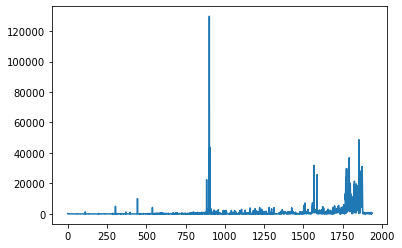

In [86]:
import matplotlib.pyplot as plt
plt.plot(df3)

In [87]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(np.array(df3).reshape(-1,1))

In [88]:
##splitting dataset into train and test split
training_size=int(len(df)*0.75)
test_size=len(df)-training_size
train_data,test_data=df[0:training_size,:],df[training_size:len(df),:1]

In [89]:
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [90]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [91]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
23/23 [==============================] - 1s 63ms/step - loss: 8.8203e-04 - accuracy: 0.0014 - val_loss: 0.0030 - val_accuracy: 0.0000e+00
Epoch 2/100
23/23 [==============================] - 1s 53ms/step - loss: 8.8179e-04 - accuracy: 0.0014 - val_loss: 0.0030 - val_accuracy: 0.0000e+00
Epoch 3/100
23/23 [==============================] - 1s 59ms/step - loss: 8.8062e-04 - accuracy: 0.0014 - val_loss: 0.0029 - val_accuracy: 0.0000e+00
Epoch 4/100
23/23 [==============================] - 1s 59ms/step - loss: 8.8726e-04 - accuracy: 0.0014 - val_loss: 0.0029 - val_accuracy: 0.0000e+00
Epoch 5/100
23/23 [==============================] - 1s 55ms/step - loss: 8.8096e-04 - accuracy: 0.0014 - val_loss: 0.0027 - val_accuracy: 0.0000e+00
Epoch 6/100
23/23 [==============================] - 1s 61ms/step - loss: 8.7539e-04 - accuracy: 0.0014 - val_loss: 0.0029 - val_accuracy: 0.0000e+00
Epoch 7/100
23/23 [==============================] - 1s 53ms/step - loss: 8.7631e-04 - accuracy: 0.0

Epoch 55/100
23/23 [==============================] - 1s 40ms/step - loss: 5.5111e-04 - accuracy: 0.0014 - val_loss: 0.0030 - val_accuracy: 0.0000e+00
Epoch 56/100
23/23 [==============================] - 1s 34ms/step - loss: 4.3972e-04 - accuracy: 0.0014 - val_loss: 0.0044 - val_accuracy: 0.0000e+00
Epoch 57/100
23/23 [==============================] - 1s 36ms/step - loss: 3.8823e-04 - accuracy: 0.0014 - val_loss: 0.0038 - val_accuracy: 0.0000e+00
Epoch 58/100
23/23 [==============================] - 1s 39ms/step - loss: 3.5053e-04 - accuracy: 0.0021 - val_loss: 0.0074 - val_accuracy: 0.0000e+00
Epoch 59/100
23/23 [==============================] - 1s 41ms/step - loss: 2.9736e-04 - accuracy: 0.0021 - val_loss: 0.0068 - val_accuracy: 0.0000e+00
Epoch 60/100
23/23 [==============================] - 1s 40ms/step - loss: 3.0555e-04 - accuracy: 0.0021 - val_loss: 0.0069 - val_accuracy: 0.0000e+00
Epoch 61/100
23/23 [==============================] - 1s 36ms/step - loss: 2.2981e-04 - accura

In [92]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [93]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

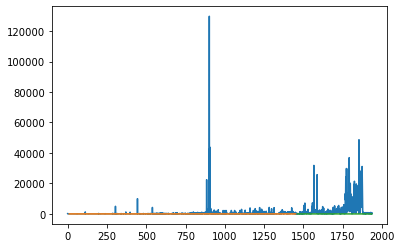

In [94]:
### Plotting 
# shift train predictions for plotting
look_back=10
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [95]:
training_size,test_size

(1452, 485)

In [96]:
x_input=test_data[475:].reshape(1,-1)
x_input.shape

(1, 10)

In [97]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [98]:
from numpy import array

lst_output=[]
n_steps=10
i=0
while(i<100):
    
    if(len(temp_input)>10):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.00181143]
11
1 day input [7.88242278e-03 7.67042607e-04 4.07419114e-03 5.62369429e-03
 9.82893794e-04 5.61598532e-03 5.78172820e-05 3.99710143e-03
 3.94313863e-03 1.81142800e-03]
1 day output [[0.00171936]]
2 day input [7.67042607e-04 4.07419114e-03 5.62369429e-03 9.82893794e-04
 5.61598532e-03 5.78172820e-05 3.99710143e-03 3.94313863e-03
 1.81142800e-03 1.71935931e-03]
2 day output [[0.00176675]]
3 day input [4.07419114e-03 5.62369429e-03 9.82893794e-04 5.61598532e-03
 5.78172820e-05 3.99710143e-03 3.94313863e-03 1.81142800e-03
 1.71935931e-03 1.76675431e-03]
3 day output [[0.00184066]]
4 day input [5.62369429e-03 9.82893794e-04 5.61598532e-03 5.78172820e-05
 3.99710143e-03 3.94313863e-03 1.81142800e-03 1.71935931e-03
 1.76675431e-03 1.84066035e-03]
4 day output [[0.00181594]]
5 day input [9.82893794e-04 5.61598532e-03 5.78172820e-05 3.99710143e-03
 3.94313863e-03 1.81142800e-03 1.71935931e-03 1.76675431e-03
 1.84066035e-03 1.81594491e-03]
5 day output [[0.0017216]]
6 day input [5.

55 day output [[0.00163759]]
56 day input [0.00163759 0.00163759 0.00163759 0.00163759 0.00163759 0.00163759
 0.00163759 0.00163758 0.00163759 0.00163759]
56 day output [[0.00163759]]
57 day input [0.00163759 0.00163759 0.00163759 0.00163759 0.00163759 0.00163759
 0.00163758 0.00163759 0.00163759 0.00163759]
57 day output [[0.00163759]]
58 day input [0.00163759 0.00163759 0.00163759 0.00163759 0.00163759 0.00163758
 0.00163759 0.00163759 0.00163759 0.00163759]
58 day output [[0.00163759]]
59 day input [0.00163759 0.00163759 0.00163759 0.00163759 0.00163758 0.00163759
 0.00163759 0.00163759 0.00163759 0.00163759]
59 day output [[0.00163759]]
60 day input [0.00163759 0.00163759 0.00163759 0.00163758 0.00163759 0.00163759
 0.00163759 0.00163759 0.00163759 0.00163759]
60 day output [[0.00163759]]
61 day input [0.00163759 0.00163759 0.00163758 0.00163759 0.00163759 0.00163759
 0.00163759 0.00163759 0.00163759 0.00163759]
61 day output [[0.00163758]]
62 day input [0.00163759 0.00163758 0.001

In [99]:
day_new=np.arange(1,101)
day_pred=np.arange(101,201)

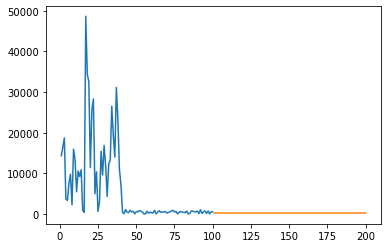

In [100]:
plt.plot(day_new,scaler.inverse_transform(df[1837:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

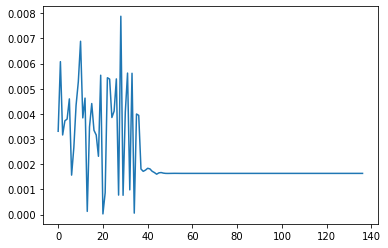

In [101]:
df1=df.tolist()
df1.extend(lst_output)
plt.plot(df1[1900:])

In [102]:
df1=scaler.inverse_transform(df1).tolist()

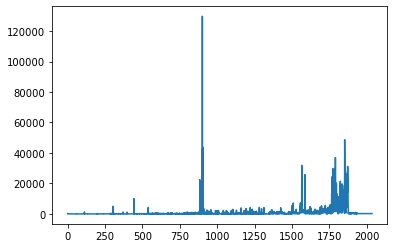

In [103]:
plt.plot(df1)

In [104]:
len(df1)

2037

In [105]:
df1[1938]

[223.53357013687489]